In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data sets

training=pd.read_excel(r'C:\Users\harry\Downloads\Data_Trains.xlsx')
testing=pd.read_excel(r'C:\Users\harry\Downloads\Data_Tests.xlsx')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [4]:
#dropping rows with null values
training = training.dropna()

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5975 non-null object
Location             5975 non-null object
Year                 5975 non-null int64
Kilometers_Driven    5975 non-null int64
Fuel_Type            5975 non-null object
Transmission         5975 non-null object
Owner_Type           5975 non-null object
Mileage              5975 non-null object
Engine               5975 non-null object
Power                5975 non-null object
Seats                5975 non-null float64
Price                5975 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [6]:
training.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
training['Fuel_Type'].value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [8]:
testing['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [9]:
#dropping null values in the testing set
testing=testing.dropna()

In [10]:
#since we can see that CNG and LPG cars are very less in number, hence we can remove these
training1=training[training['Fuel_Type']!='CNG']
training2=training1[training1['Fuel_Type']!='LPG']
testing1=testing[testing['Fuel_Type']!='CNG']
testing2=testing1[testing1['Fuel_Type']!='LPG']

In [11]:
training2['Fuel_Type'].value_counts()

Diesel    3195
Petrol    2714
Name: Fuel_Type, dtype: int64

In [12]:
testing2['Fuel_Type'].value_counts()

Diesel    643
Petrol    572
Name: Fuel_Type, dtype: int64

In [13]:
training2['Transmission'].value_counts()

Manual       4200
Automatic    1709
Name: Transmission, dtype: int64

In [14]:
testing2['Transmission'].value_counts()

Manual       889
Automatic    326
Name: Transmission, dtype: int64

In [15]:
training2['Owner_Type'].value_counts()

First             4850
Second             941
Third              110
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [16]:
testing2['Owner_Type'].value_counts()

First             1011
Second             178
Third               23
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [17]:
#hence we can remove the entries with owner type value as fourth & above
training2=training2[training2['Owner_Type']!='Fourth & Above']
testing2=testing2[testing2['Owner_Type']!='Fourth & Above']

In [18]:
training2['Owner_Type'].value_counts()

First     4850
Second     941
Third      110
Name: Owner_Type, dtype: int64

In [19]:
testing2['Owner_Type'].value_counts()

First     1011
Second     178
Third       23
Name: Owner_Type, dtype: int64

In [20]:
#segregating the Name of the car into three separate columns
for i in list(training2.index.values):
    training2['Name'][i]=training2['Name'][i].replace(' New','')
    training2['Name'][i]=training2['Name'][i].replace('Range Rover','Range_Rover')
    training2['Name'][i]=training2['Name'][i].replace('Land Rover','Land_Rover')
    training2['Name'][i]=training2['Name'][i].replace(' Series','_Series')
    training2['Name'][i]=training2['Name'][i].replace('Wagon R','Wagon_R')
for i in list(testing2.index.values):
    testing2['Name'][i]=testing2['Name'][i].replace(' New','')
    testing2['Name'][i]=testing2['Name'][i].replace('Range Rover','Range_Rover')
    testing2['Name'][i]=testing2['Name'][i].replace('Land Rover','Land_Rover')
    testing2['Name'][i]=testing2['Name'][i].replace(' Series','_Series')
    testing2['Name'][i]=testing2['Name'][i].replace('Wagon R','Wagon_R')

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_laun

In [21]:
for i in list(training2.index.values):
    training2['Name'][i]=training2['Name'][i].split(' ',2)
for i in list(testing2.index.values):
    testing2['Name'][i]=testing['Name'][i].split(' ',2)

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
training2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,"[Hyundai, Creta, 1.6 CRDi SX Option]",Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,"[Honda, Jazz, V]",Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,"[Maruti, Ertiga, VDI]",Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,"[Audi, A4, 2.0 TDI Multitronic]",Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
6,"[Nissan, Micra, Diesel XV]",Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


In [23]:
training2['Seats'].value_counts()

5.0     4952
7.0      668
8.0      132
4.0       93
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [24]:
testing2['Seats'].value_counts()

5.0     1027
7.0      122
8.0       35
4.0       16
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [25]:
seats=[5.0,7.0]
training3=training2[training2['Seats'].isin(seats)]

In [26]:
testing3=testing2[testing2['Seats'].isin(seats)]

In [27]:
training3['Seats'].value_counts()

5.0    4952
7.0     668
Name: Seats, dtype: int64

In [28]:
testing3['Seats'].value_counts()

5.0    1027
7.0     122
Name: Seats, dtype: int64

In [29]:
list_brand=[]
list_model=[]
list_version=[]
for i in list(training3.index.values):
    list_brand.append(training3['Name'][i][0])
    list_model.append(training3['Name'][i][1])
    if(len(training3['Name'][i])>2):
        list_version.append(training3['Name'][i][2])
    else:
        list_version.append('None')
training3['Brand']=list_brand
training3['Model']=list_model
training3['Version']=list_version

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [30]:
list_brand=[]
list_model=[]
list_version=[]
for i in list(testing3.index.values):
    list_brand.append(testing3['Name'][i][0])
    list_model.append(testing3['Name'][i][1])
    if(len(testing3['Name'][i])>2):
        list_version.append(testing3['Name'][i][2])
    else:
        list_version.append('None')
testing3['Brand']=list_brand
testing3['Model']=list_model
testing3['Version']=list_version

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [31]:
training3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
1,"[Hyundai, Creta, 1.6 CRDi SX Option]",Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,"[Honda, Jazz, V]",Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,"[Maruti, Ertiga, VDI]",Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,"[Audi, A4, 2.0 TDI Multitronic]",Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,2.0 TDI Multitronic
6,"[Nissan, Micra, Diesel XV]",Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Nissan,Micra,Diesel XV


In [32]:
testing3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
1,"[Maruti, Alto, 800 2016-2019 LXI]",Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,800 2016-2019 LXI
2,"[Toyota, Innova, Crysta Touring Sport 2.4 MT]",Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,"[Toyota, Etios, Liva GD]",Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,Liva GD
4,"[Hyundai, i20, Magna]",Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,Magna
5,"[Mahindra, XUV500, W8 2WD]",Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,Mahindra,XUV500,W8 2WD


In [33]:
#dropping the name columns
training3.drop(['Name'],axis=1,inplace=True)
testing3.drop(['Name'],axis=1,inplace=True)

C:\Users\harry\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
training3.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,2.0 TDI Multitronic
6,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Nissan,Micra,Diesel XV


In [35]:
testing3.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,Magna
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,Mahindra,XUV500,W8 2WD


In [36]:
training3['Version'].nunique()

1548

In [37]:
testing3['Version'].nunique()

666

In [38]:
#since the number of versions are way too many
#now dropping the version columns
training3.drop(['Version'],axis=1,inplace=True)
testing3.drop(['Version'],axis=1,inplace=True)

In [39]:
#converting mileage , engine and power attributes to numeric values
for i in list(training3.index.values):
    training3['Mileage'][i]=training3['Mileage'][i].replace(' kmpl','')
    training3['Engine'][i]=training3['Engine'][i].replace(' CC','')
    training3['Power'][i]=training3['Power'][i].replace(' bhp','')
for i in list(testing3.index.values):
    testing3['Mileage'][i]=testing3['Mileage'][i].replace(' kmpl','')
    testing3['Engine'][i]=testing3['Engine'][i].replace(' CC','')
    testing3['Power'][i]=testing3['Power'][i].replace(' bhp','')

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harry\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [40]:
training3=training3[training3['Mileage']!='0.0']
training3=training3[training3['Mileage']!='null']
training3=training3[training3['Engine']!='0.0']
training3=training3[training3['Engine']!='null']
training3=training3[training3['Power']!='0.0']
training3=training3[training3['Power']!='null']
testing3=testing3[testing3['Mileage']!='0.0']
testing3=testing3[testing3['Mileage']!='null']
testing3=testing3[testing3['Engine']!='0.0']
testing3=testing3[testing3['Engine']!='null']
testing3=testing3[testing3['Power']!='0.0']
testing3=testing3[testing3['Power']!='null']

In [41]:
training3[['Mileage','Engine','Power']]=training3[['Mileage','Engine','Power']].apply(pd.to_numeric)

In [42]:
training3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5498 entries, 1 to 6018
Data columns (total 13 columns):
Location             5498 non-null object
Year                 5498 non-null int64
Kilometers_Driven    5498 non-null int64
Fuel_Type            5498 non-null object
Transmission         5498 non-null object
Owner_Type           5498 non-null object
Mileage              5498 non-null float64
Engine               5498 non-null int64
Power                5498 non-null float64
Seats                5498 non-null float64
Price                5498 non-null float64
Brand                5498 non-null object
Model                5498 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 601.3+ KB


In [43]:
testing3[['Mileage','Engine','Power']]=testing3[['Mileage','Engine','Power']].apply(pd.to_numeric)

In [44]:
testing3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 1 to 1233
Data columns (total 12 columns):
Location             1122 non-null object
Year                 1122 non-null int64
Kilometers_Driven    1122 non-null int64
Fuel_Type            1122 non-null object
Transmission         1122 non-null object
Owner_Type           1122 non-null object
Mileage              1122 non-null float64
Engine               1122 non-null int64
Power                1122 non-null float64
Seats                1122 non-null float64
Brand                1122 non-null object
Model                1122 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 114.0+ KB


In [45]:
#getting an idea of the correlation of the features
training3.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.159057,0.289342,-0.054619,0.009923,0.073282,0.315578
Kilometers_Driven,-0.159057,1.000000,-0.055339,0.093188,0.049667,0.054333,0.008092
Mileage,0.289342,-0.055339,1.000000,-0.634935,-0.569718,-0.352503,-0.337294
Engine,-0.054619,0.093188,-0.634935,1.000000,0.880855,0.491976,0.653562
Power,0.009923,0.049667,-0.569718,0.880855,1.000000,0.248332,0.754567
Seats,0.073282,0.054333,-0.352503,0.491976,0.248332,1.000000,0.196142
Price,0.315578,0.008092,-0.337294,0.653562,0.754567,0.196142,1.000000


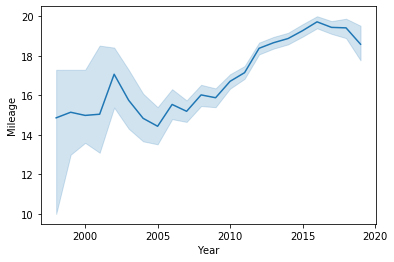

In [46]:
#for the year feature, we can see that it is correlated to Mileage and Price
#plotting the suitable plots for these
sns.lineplot(data=training3,x='Year',y='Mileage')

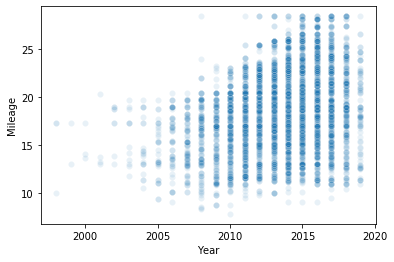

In [47]:
sns.scatterplot(data=training3,x='Year',y='Mileage',alpha=0.1)

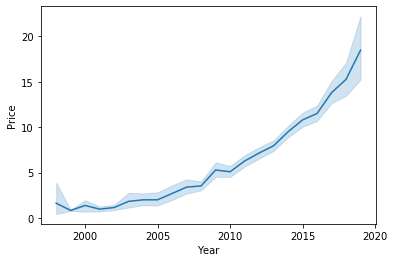

In [48]:
sns.lineplot(data=training3,x='Year',y='Price')

## As is clear from the plots, that later cars provide better mileage and are costlier.

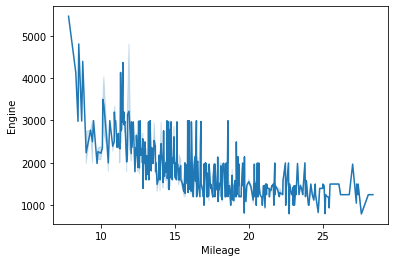

In [49]:
#for the mileage feature 
#mileage vs engine
sns.lineplot(data=training3,x='Mileage',y='Engine')

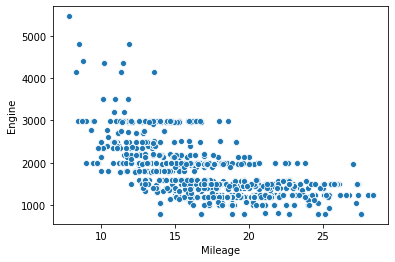

In [50]:
sns.scatterplot(data=training3,x='Mileage',y='Engine')

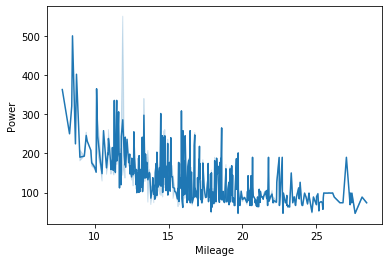

In [51]:
#mileage vs power
sns.lineplot(data=training3,x='Mileage',y='Power')

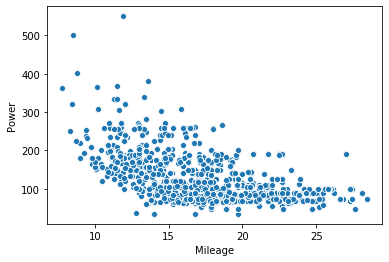

In [52]:
sns.scatterplot(data=training3,x='Mileage',y='Power')

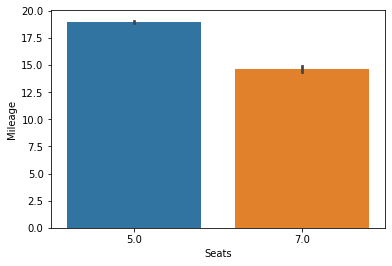

In [53]:
#mileage vs number of seats
sns.barplot(data=training3,x='Seats',y='Mileage')

[(0, 80)]

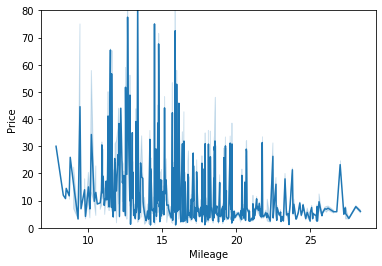

In [54]:
#mileage vs price
sns.lineplot(data=training3,x='Mileage',y='Price').set(ylim=(0,80))

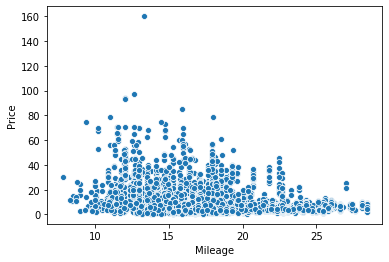

In [55]:
sns.scatterplot(data=training3,x='Mileage',y='Price')

## Following conclusions can be made about the Mileage feature from the above plots :
1. Mileage decreases with the increase in power of the engine. <br>
2. 5 seater cars provide better mileage than 7 seater cars. <br>
3. The more expensive cars generally provide worse mileage.

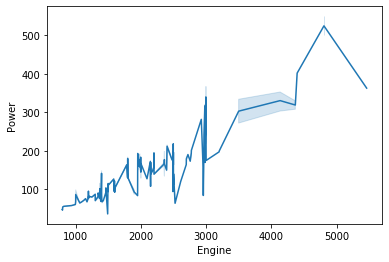

In [56]:
#engine feature
#engine vs power
sns.lineplot(data=training3,x='Engine',y='Power')

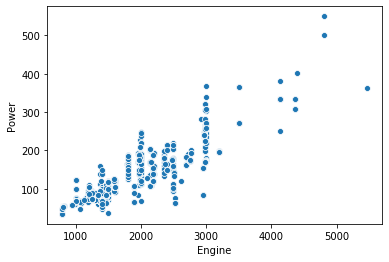

In [57]:
sns.scatterplot(data=training3,x='Engine',y='Power')

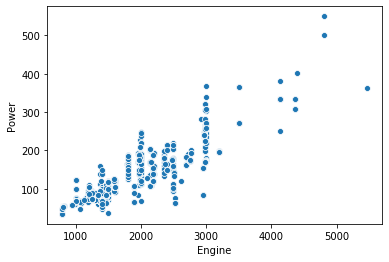

In [58]:
sns.scatterplot(data=training3,x='Engine',y='Power')

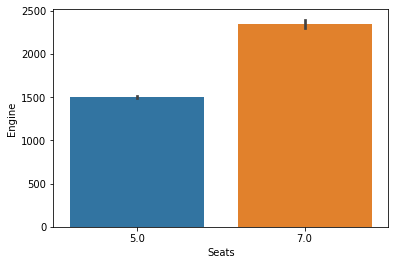

In [59]:
#engine vs seats
sns.barplot(data=training3,x='Seats',y='Engine')

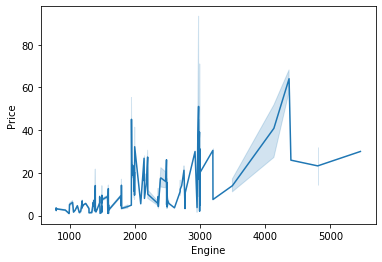

In [60]:
#engine vs price
sns.lineplot(data=training3,x='Engine',y='Price')

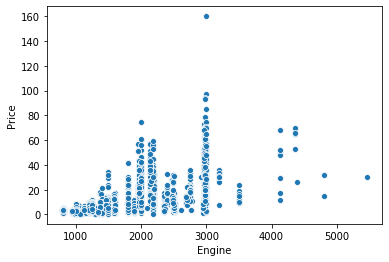

In [61]:
sns.scatterplot(data=training3,x='Engine',y='Price')

## From the plots above, the following conclusions can be made about the Engine feature:
1. The Power increases with the increase in Engine. <br>
2. 7 seater cars have more powerful engines than the 5 seater cars. <br>
3. The prices of the cars generally increase with the increase in power of the engine.

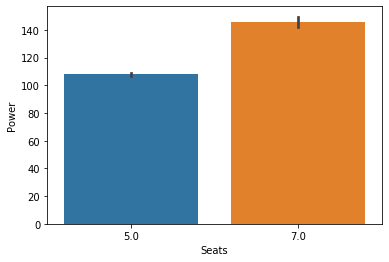

In [62]:
#power feature
#power vs seats 
sns.barplot(data=training3,x='Seats',y='Power')

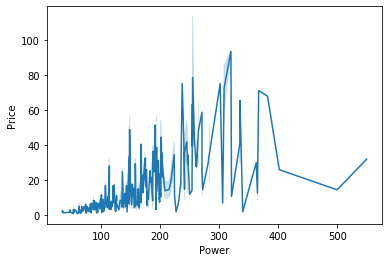

In [63]:
#power vs price
sns.lineplot(data=training3, x='Power',y='Price')

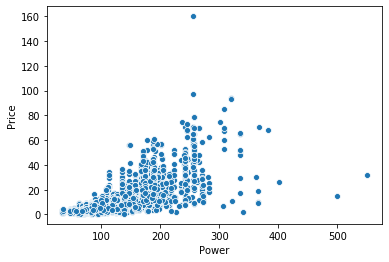

In [64]:
sns.scatterplot(data=training3,x='Power',y='Price')

## From the plots above, following conclusions can be made about the Power Feature :
1. 7 seater cars are more powerful than 5 seater cars. <br>
2. The price of cars increase with the increase in the power of the cars.

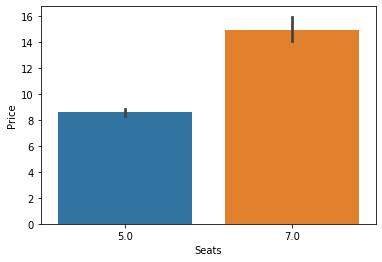

In [65]:
#seats vs price
sns.barplot(data=training3,x='Seats',y='Price')

## As we can clearly see from the plot above, the price of 7 seater cars is more than the price of 5 seater cars.

# Inferences about the Price of the Cars :
1. The Price of 7 seater cars is more than the Price of the 5 seater cars. <br>
2. The Price of cars increases with the increase in Power of the cars. <br>
3. The Price of cars increases with the increase in CC of the Engine. <br>
4. The Price of the cars decreases with the increase in the Mileage of the cars. 

# Detecting Outliers :

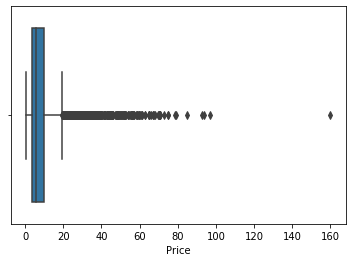

In [66]:
sns.boxplot(training3['Price'])

In [67]:
#removing cars with prices more than 60 lacs
c=0
for i in list(training3.index.values):
    if(training3['Price'][i]>60):
        c=c+1
c

34

In [68]:
training3=training3[training3['Price']<=60]

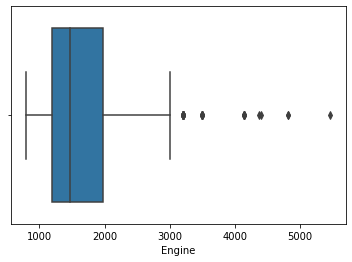

In [69]:
sns.boxplot(training3['Engine'])

In [70]:
c=0
for i in list(training3.index.values):
    if(training3['Engine'][i]>3000):
        c=c+1
c

37

In [71]:
#removing cars with engines more than 3000 CC
training3=training3[training3['Engine']<=3000]

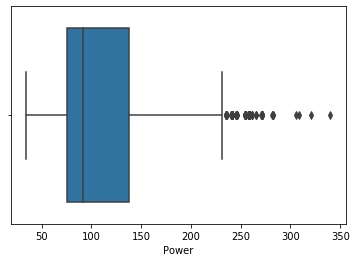

In [72]:
sns.boxplot(training3['Power'])

In [73]:
c=0
for i in list(training3.index.values):
    if(training3['Power'][i]>250):
        c=c+1
c

74

In [74]:
#removing cars with power more than 250
training3=training3[training3['Power']<=250]

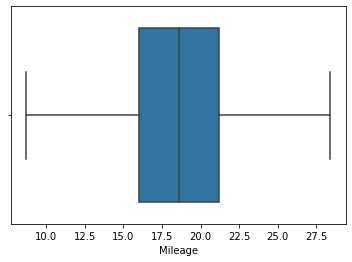

In [75]:
sns.boxplot(training3['Mileage'])

In [76]:
training3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 1 to 6018
Data columns (total 13 columns):
Location             5353 non-null object
Year                 5353 non-null int64
Kilometers_Driven    5353 non-null int64
Fuel_Type            5353 non-null object
Transmission         5353 non-null object
Owner_Type           5353 non-null object
Mileage              5353 non-null float64
Engine               5353 non-null int64
Power                5353 non-null float64
Seats                5353 non-null float64
Price                5353 non-null float64
Brand                5353 non-null object
Model                5353 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 585.5+ KB


In [77]:
testing3=testing3[testing3['Engine']<=3000]
testing3=testing3[testing3['Power']<=250]

In [78]:
testing3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 1 to 1233
Data columns (total 12 columns):
Location             1103 non-null object
Year                 1103 non-null int64
Kilometers_Driven    1103 non-null int64
Fuel_Type            1103 non-null object
Transmission         1103 non-null object
Owner_Type           1103 non-null object
Mileage              1103 non-null float64
Engine               1103 non-null int64
Power                1103 non-null float64
Seats                1103 non-null float64
Brand                1103 non-null object
Model                1103 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 112.0+ KB


In [79]:
training_final=training3.copy()
testing_final=testing3.copy()

In [80]:
training3['Seats']=training3['Seats'].astype(str)
testing3['Seats']=testing3['Seats'].astype(str)

In [81]:
training3=pd.get_dummies(training3)
training3.shape

(5353, 230)

In [82]:
testing3=pd.get_dummies(testing3)
testing3.shape

(1103, 197)

# TRAINING MODELS :

## LINEAR REGRESSION :

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

y=training3['Price']
training3.drop(['Price'],axis=1,inplace=True)
x=training3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-1652.8876465751594
[ 8.29909491e-01 -1.74448317e-05 -6.85093005e-02 -5.06177864e-03
  4.73276019e-02 -4.74616897e-01  1.35115233e+00  4.57020783e-01
  1.36893464e+00 -1.01225029e+00  9.99016628e-01  1.85856361e-01
 -5.59204874e-01 -1.42295194e+00 -8.16650156e-01 -7.63065861e-02
  8.15364719e-01 -8.15364719e-01  4.12714835e-01 -4.12714835e-01
  2.08623870e-01 -2.46332862e-01  3.77089914e-02 -4.22636908e-03
  4.22636907e-03  2.75877646e+00  9.82081876e+00  5.44627272e+00
 -6.83567111e+00 -9.93201172e+00 -7.36493335e+00 -1.78340372e+00
 -5.85016472e+00 -6.25786503e+00 -1.13811848e+01 -1.62050160e+00
  2.89887417e+00  1.13929987e+01  9.25016772e-02  1.32641825e+01
 -5.45377280e+00 -5.61513633e+00  1.61416043e+01  8.39990801e+00
 -4.48680213e-01 -5.28715568e+00  1.67497725e+01 -6.62162939e+00
 -3.71242445e+00 -7.51658884e+00  1.65836490e-02 -4.55922997e+00
  3.25806021e+00 -4.08826834e+00 -1.50407946e+00  2.98427985e+00
 -1.30242940e+01 -2.23373494e+00 -6.01839288e+00 -6.24471797e+00
 -2.2

In [84]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
512,13.56,12.848869
5514,7.50,7.363772
5763,7.90,8.738517
1959,1.37,-1.292580
1728,4.15,4.208297
...,...,...
2615,2.40,2.276226
5774,1.95,3.389249
1329,4.39,5.315500
5986,0.85,-0.266015


In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.7775155727962348
Mean Squared Error: 7.793491740006565
Root Mean Squared Error: 2.7916826001547106
R2_Score: 0.8849824373867279


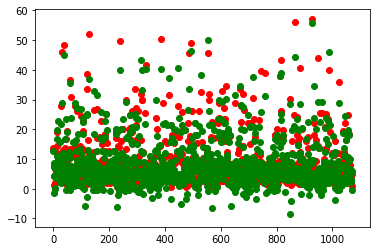

In [99]:
list_len=[]
for i in range (0,len(y_test)):
    list_len.append(i)
plt.scatter(list_len,y_test,color='red')
plt.scatter(list_len,y_pred,color='green')
plt.show()

## RANDOM FOREST REGRESSOR :

In [87]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor_rfe = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor_rfe.fit(x_train, y_train)
y_pred_rfe = regressor_rfe.predict(x_test)
df_rfe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfe})
df_rfe

,Actual,Predicted
512,13.56,12.6432
5514,7.50,5.8530
5763,7.90,7.0626
1959,1.37,1.7704
1728,4.15,4.0849
...,...,...
2615,2.40,3.4651
5774,1.95,2.0079
1329,4.39,4.0628
5986,0.85,1.0052


In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_rfe))

Mean Absolute Error: 1.043234168667467
Mean Squared Error: 4.323936962898441
Root Mean Squared Error: 2.0794078394818176
R2_Score: 0.9361866661366868


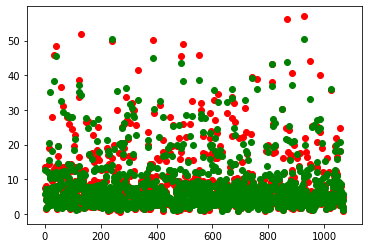

In [98]:
list_len=[]
for i in range (0,len(y_test)):
    list_len.append(i)
plt.scatter(list_len,y_test,color='red')
plt.scatter(list_len,y_pred_rfe,color='green')
plt.show()

## FINE TUNING THE RANDOM FOREST REGRESSOR :

In [109]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor_rfe_ft1 = RandomForestRegressor(n_estimators = 500, random_state = 0) 
  
# fit the regressor with x and y data 
regressor_rfe_ft1.fit(x_train, y_train)
y_pred_rfe_ft1 = regressor_rfe_ft1.predict(x_test)
df_rfe_ft1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfe_ft1})
df_rfe_ft1

,Actual,Predicted
512,13.56,12.659560
5514,7.50,5.951567
5763,7.90,7.064980
1959,1.37,1.842060
1728,4.15,4.069060
...,...,...
2615,2.40,3.583700
5774,1.95,1.970227
1329,4.39,4.131380
5986,0.85,0.958820


In [110]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfe_ft1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfe_ft1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe_ft1)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_rfe_ft1))

Mean Absolute Error: 1.0295057969632293
Mean Squared Error: 4.228336543733607
Root Mean Squared Error: 2.0562919402977795
R2_Score: 0.9375975519840024


In [106]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor_rfe_ft2 = RandomForestRegressor(n_estimators = 500, random_state = 0,min_samples_leaf=50) 
  
# fit the regressor with x and y data 
regressor_rfe_ft2.fit(x_train, y_train)
y_pred_rfe_ft2 = regressor_rfe_ft2.predict(x_test)
df_rfe_ft2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfe_ft2})
df_rfe_ft2

,Actual,Predicted
512,13.56,11.579002
5514,7.50,6.074387
5763,7.90,8.118858
1959,1.37,1.681038
1728,4.15,4.579703
...,...,...
2615,2.40,4.613014
5774,1.95,1.625210
1329,4.39,4.398540
5986,0.85,1.437485


In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfe_ft2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfe_ft2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe_ft2)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_rfe_ft2))

Mean Absolute Error: 1.8482016079490886
Mean Squared Error: 12.595130185789502
Root Mean Squared Error: 3.548961846200872
R2_Score: 0.8141191107793313


In [111]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor_rfe_ft3 = RandomForestRegressor(n_estimators = 1000, random_state = 0) 
  
# fit the regressor with x and y data 
regressor_rfe_ft3.fit(x_train, y_train)
y_pred_rfe_ft3 = regressor_rfe_ft3.predict(x_test)
df_rfe_ft3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfe_ft3})
df_rfe_ft3

,Actual,Predicted
512,13.56,12.613620
5514,7.50,5.970403
5763,7.90,7.077900
1959,1.37,1.848970
1728,4.15,4.104490
...,...,...
2615,2.40,3.601920
5774,1.95,1.984633
1329,4.39,4.095410
5986,0.85,0.971870


In [112]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfe_ft3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfe_ft3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe_ft3)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_rfe_ft3))

Mean Absolute Error: 1.0324898488951129
Mean Squared Error: 4.2600057913497285
Root Mean Squared Error: 2.0639781470136085
R2_Score: 0.9371301723046342


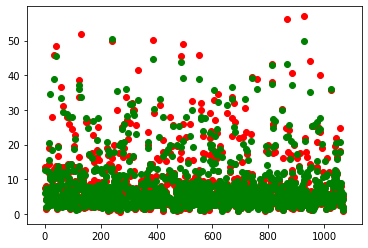

In [113]:
list_len=[]
for i in range (0,len(y_test)):
    list_len.append(i)
plt.scatter(list_len,y_test,color='red')
plt.scatter(list_len,y_pred_rfe_ft1,color='green')
plt.show()

# HENCE, WE DEPLOY RANDOM FOREST REGRESSOR AS THE MODEL BECAUSE IT PROVIDES THE BEST ACCURACY WITH n_estimators = 500:
Mean Absolute Error: 1.0295057969632293<br>
Mean Squared Error: 4.228336543733607<br>
Root Mean Squared Error: 2.0562919402977795<br>
R2_Score: 0.9375975519840024<br>

# PREDICTING THE VALUES FOR THE TEST SET :

In [114]:
train=training3
test=testing3
train,test=train.align(test,join='inner',axis=1)

In [115]:
train.shape

(5353, 187)

In [116]:
test.shape

(1103, 187)

In [117]:
#applying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor_rfe_final = RandomForestRegressor(n_estimators = 500, random_state = 0) 
  
# fit the regressor with x and y data 
regressor_rfe_final.fit(train, y)
y_pred_rfe_final = regressor_rfe_final.predict(test)
df_rfe_ft1 = pd.DataFrame({'Predicted': y_pred_rfe_final})
df_rfe_ft1

,Predicted
0,3.193860
1,17.860313
2,4.832620
3,12.545920
4,21.998663
...,...
1098,4.169740
1099,6.381790
1100,2.646980
1101,4.422020


## The predicted values are as above
# THANK YOU